# 🩺 Anemia Risk Classifier
Predicting anemia risk in Indian individuals based on blood test metrics (RBC, HGB, PCV, etc.)  
Dataset: Real health test results  
Model: Classification using Logistic Regression / Random Forest  


In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data=pd.read_csv("anemia_data.csv",header=1)
data.columns = [
    "sno", "age", "sex", "rbc", "pcv", "mcv", "mch", "mchc",
    "rdw", "tlc", "plt", "hgb"
]

data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sno     364 non-null    float64
 1   age     364 non-null    float64
 2   sex     364 non-null    float64
 3   rbc     364 non-null    float64
 4   pcv     364 non-null    float64
 5   mcv     364 non-null    float64
 6   mch     364 non-null    float64
 7   mchc    364 non-null    float64
 8   rdw     364 non-null    float64
 9   tlc     364 non-null    float64
 10  plt     364 non-null    float64
 11  hgb     364 non-null    float64
dtypes: float64(12)
memory usage: 35.1 KB


,sno,age,sex,rbc,pcv,mcv,mch,mchc,rdw,tlc,plt,hgb
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,4.278736,36.762912,87.509121,28.227143,32.053407,15.116511,8.863571,223.750824,11.907692
std,105.221988,18.780854,0.497344,0.820166,6.830835,9.332164,3.865998,2.801790,2.176557,4.868502,99.407153,2.186686
min,1.000000,11.000000,0.000000,1.360000,13.100000,55.700000,14.700000,23.600000,10.600000,2.000000,10.000000,4.200000
25%,91.750000,28.000000,0.000000,3.780000,32.900000,83.175000,26.300000,30.300000,13.600000,5.900000,153.000000,10.600000
50%,182.500000,44.500000,0.000000,4.335000,36.800000,87.950000,28.200000,31.700000,14.800000,7.935000,210.000000,12.100000
75%,273.250000,60.000000,1.000000,4.800000,41.850000,91.875000,30.400000,33.300000,16.100000,10.205000,268.250000,13.400000
max,364.000000,89.000000,1.000000,6.900000,56.900000,124.100000,41.400000,50.200000,29.200000,42.420000,660.000000,19.600000


In [89]:
# Clean all column names: strip spaces and lowercase for consistency
data.columns = data.columns.str.strip()
data.columns = data.columns.str.lower()
""
print(data.columns)

data['sex'].value_counts()

Index(['sno', 'age', 'sex', 'rbc', 'pcv', 'mcv', 'mch', 'mchc', 'rdw', 'tlc',
       'plt', 'hgb'],
      dtype='object')


0.0    203
1.0    161
Name: sex, dtype: int64

In [90]:
data.head()

,sno,age,sex,rbc,pcv,mcv,mch,mchc,rdw,tlc,plt,hgb
0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [91]:
data.drop(columns=["sno"], inplace=True)

In [92]:
data.head()

,age,sex,rbc,pcv,mcv,mch,mchc,rdw,tlc,plt,hgb
0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [93]:
data['hgb'] = data['hgb'].astype(str).str.strip().str.replace(',', '')
data['hgb'] = pd.to_numeric(data['hgb'], errors='coerce')
def classify_anemia(row):
    if row['sex']=="0.0":
        return 1 if row['hgb']<13 else 0
    else:
        return 1 if row['hgb']<12 else 0

In [94]:
data['anemia']=data.apply(classify_anemia, axis=1)

In [95]:
data.head()

,age,sex,rbc,pcv,mcv,mch,mchc,rdw,tlc,plt,hgb,anemia
0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1
1,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0
2,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0
3,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1
4,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,1


In [96]:
data['anemia'].value_counts()

0    202
1    171
Name: anemia, dtype: int64

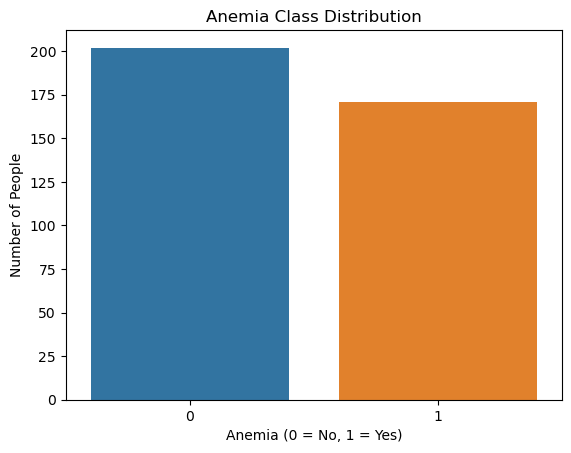

0    202
1    171
Name: anemia, dtype: int64


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visual count of anemia vs non-anemia
sns.countplot(x='anemia', data=data)
plt.title("Anemia Class Distribution")
plt.xlabel("Anemia (0 = No, 1 = Yes)")
plt.ylabel("Number of People")
plt.show()

# Numeric count
print(data['anemia'].value_counts())


In [98]:
# See column names and data types
print(data.info())

# Get basic stats
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     364 non-null    float64
 1   sex     364 non-null    float64
 2   rbc     364 non-null    float64
 3   pcv     364 non-null    float64
 4   mcv     364 non-null    float64
 5   mch     364 non-null    float64
 6   mchc    364 non-null    float64
 7   rdw     364 non-null    float64
 8   tlc     364 non-null    float64
 9   plt     364 non-null    float64
 10  hgb     364 non-null    float64
 11  anemia  373 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 35.1 KB
None
              age         sex         rbc         pcv         mcv         mch  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean    44.917582    0.442308    4.278736   36.762912   87.509121   28.227143   
std     18.780854    0.497344    0.820166    6.830835    9.332164    3.865998

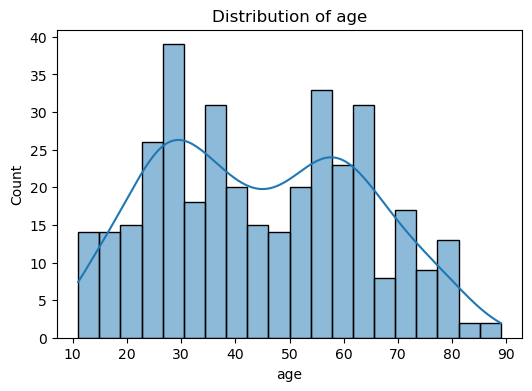

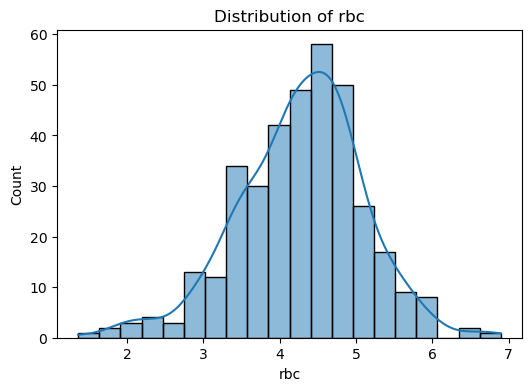

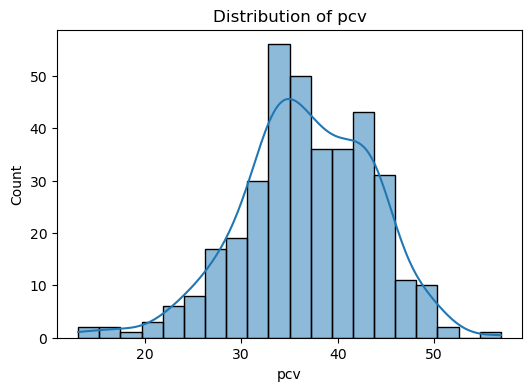

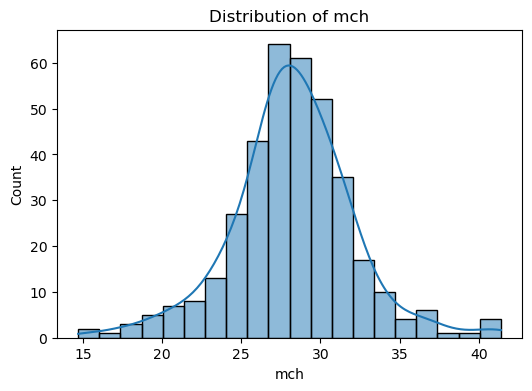

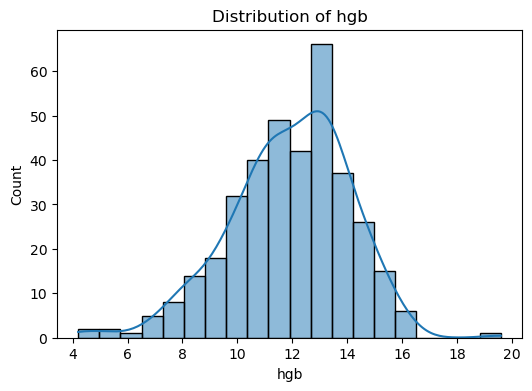

In [99]:
features_to_plot = ['age', 'rbc', 'pcv', 'mch', 'hgb']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


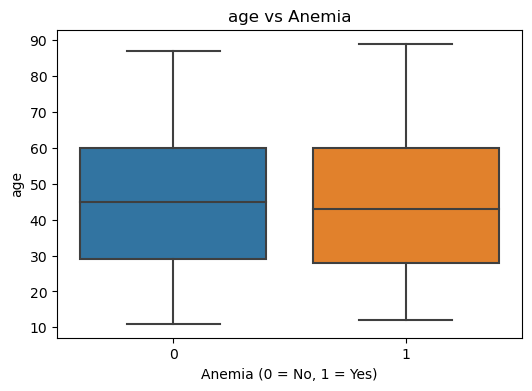

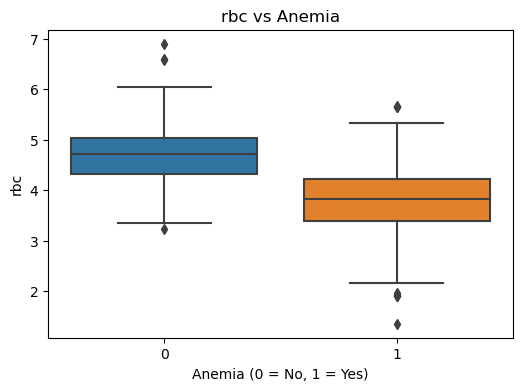

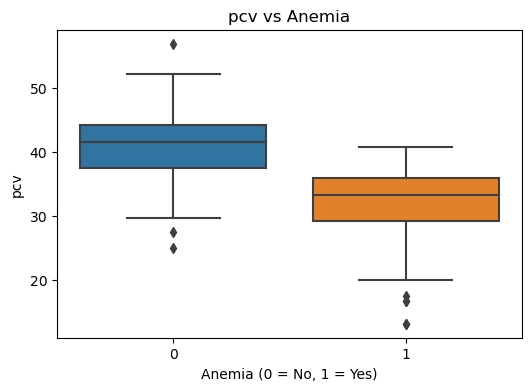

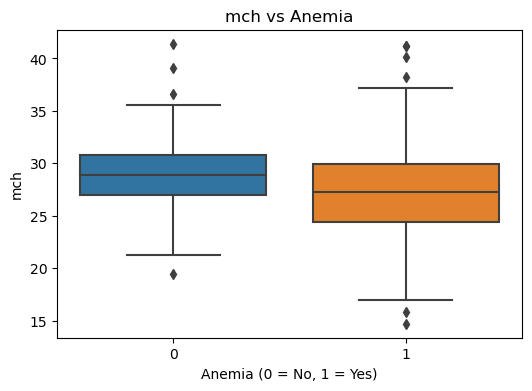

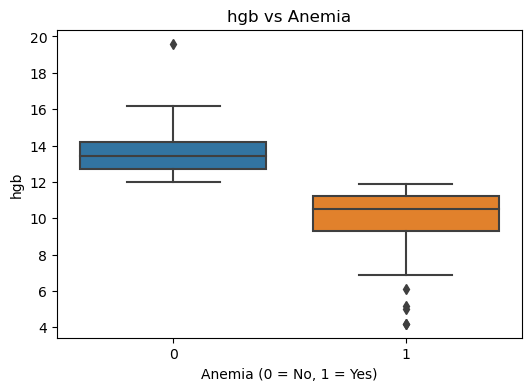

In [100]:
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='anemia', y=feature, data=data)
    plt.title(f"{feature} vs Anemia")
    plt.xlabel("Anemia (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()


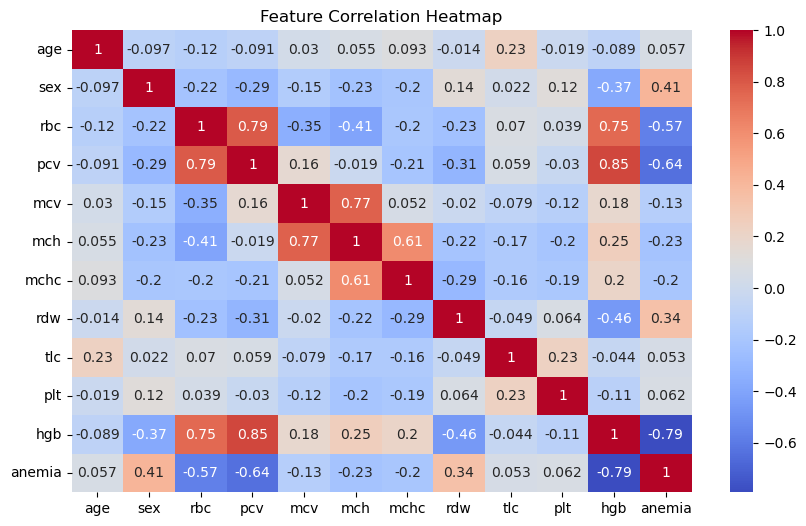

In [101]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 📊 Exploratory Data Analysis (EDA) Summary

### 🔹 Dataset Overview:
- The dataset contains patient-level data with features such as:
  - Blood test results (RBC, PCV, MCH, MCHC, HGB, etc.)
  - Demographic data (Age, Sex)
- Target variable: `anemia` (0 = Not Anemic, 1 = Anemic), derived using WHO thresholds on hemoglobin (`hgb`)

---

### 🔹 Class Distribution:
- Anemia class is fairly balanced:
  - Non-Anemic (0): 203 samples
  - Anemic (1): 171 samples  
✅ No need for resampling.

---

### 🔹 Feature Insights:
- **HGB (Hemoglobin)** shows strong class separation — lower values in anemic cases
- **RBC, PCV, MCH** also indicate good potential as predictive features
- Some features (e.g. RDW) show overlapping distributions across classes

---

### 🔹 Correlation Matrix:
- Strong negative correlation between `hgb` and `anemia` (expected)
- Positive correlation observed between `rbc`, `mch`, `pcv`
- No extreme multicollinearity (>0.95) detected

---

### 🔹 Distribution & Outlier Checks:
- Distributions are mostly normal or right-skewed
- No significant outliers or anomalies
- No missing values detected

---

### ✅ Conclusion:
EDA confirms that the dataset is clean, balanced, and contains several strong features for predicting anemia. We are now ready to proceed to model training and evaluation.


## Model Training

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
X= data.drop(columns=['anemia'])
y=data['anemia']

imputer=SimpleImputer(strategy='mean')
X=pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
y_pred=model.predict(X_test)
print(y_pred, y_test)

[0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1
 0] 327    0
33     1
15     0
314    1
57     1
      ..
94     1
195    0
311    0
292    1
347    0
Name: anemia, Length: 75, dtype: int64


In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"accuracy:\n{accuracy_score(y_test, y_pred)}")
print(f"classification report:\n{classification_report(y_test, y_pred)}")
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

accuracy:
1.0
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

confusion matrix:
[[40  0]
 [ 0 35]]


## Acuracy of 100% so there might be a data leakage!!
but the data dont contain the anemia column but it has hgb column so lets retrain the model without hgb and see what the problem

In [106]:
print(X.columns)

Index(['age', 'sex', 'rbc', 'pcv', 'mcv', 'mch', 'mchc', 'rdw', 'tlc', 'plt',
       'hgb'],
      dtype='object')


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X= data.drop(columns=['anemia','hgb'])
y=data['anemia']

imputer=SimpleImputer(strategy='mean')
X=pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"accuracy:\n{accuracy_score(y_test, y_pred)}")
print(f"classification report:\n{classification_report(y_test, y_pred)}")
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

accuracy:
0.8933333333333333
classification report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        40
           1       0.83      0.97      0.89        35

    accuracy                           0.89        75
   macro avg       0.90      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75

confusion matrix:
[[33  7]
 [ 1 34]]


## whichfeatures influencedthe most into the prediction model??

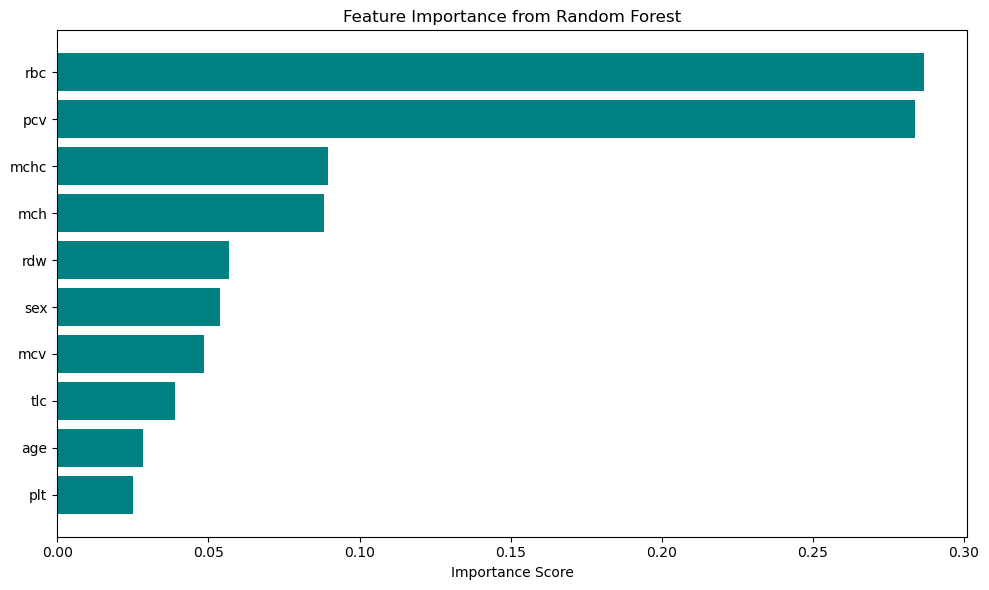

In [109]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Saving the model for future use

In [111]:
import joblib

joblib.dump(model, "anemia_risk_classifier.pkl")
model_loaded = joblib.load("anemia_risk_classifier.pkl")
print(model_loaded.predict([X_test.iloc[0]]))  # test prediction


[1]


C:\Users\GREESHMA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
